In [10]:
import numpy as np

eff_a = np.loadtxt('effA_-5to30.dat')

# print(eff_a[:,4])

arg = np.abs(10 - eff_a[:,0])
print(arg)
print(eff_a[arg.argmin()][4])

[9.900000e+00 9.874107e+00 9.841511e+00 9.800474e+00 9.748811e+00
 9.683772e+00 9.601893e+00 9.498813e+00 9.369043e+00 9.205672e+00
 9.000000e+00 8.741070e+00 8.415110e+00 8.004740e+00 7.488110e+00
 6.837720e+00 6.018930e+00 4.988130e+00 3.690430e+00 2.056720e+00
 0.000000e+00 2.589300e+00 5.848900e+00 9.952600e+00 1.511890e+01
 2.162280e+01 2.981070e+01 4.011870e+01 5.309570e+01 6.943280e+01
 9.000000e+01 1.158930e+02 1.484890e+02 1.895260e+02 2.411890e+02
 3.062280e+02 3.881070e+02 4.911870e+02 6.209570e+02 7.843280e+02
 9.900000e+02 1.248930e+03 1.574890e+03 1.985260e+03 2.501890e+03
 3.152280e+03 3.971070e+03 5.001870e+03 6.299570e+03 7.933280e+03
 9.990000e+03 1.257930e+04 1.583890e+04 1.994260e+04 2.510890e+04
 3.161280e+04 3.980070e+04 5.010870e+04 6.308570e+04 7.942280e+04
 9.999000e+04 1.258830e+05 1.584790e+05 1.995160e+05 2.511790e+05
 3.162180e+05 3.980970e+05 5.011770e+05 6.309470e+05 7.943180e+05]
9.75684


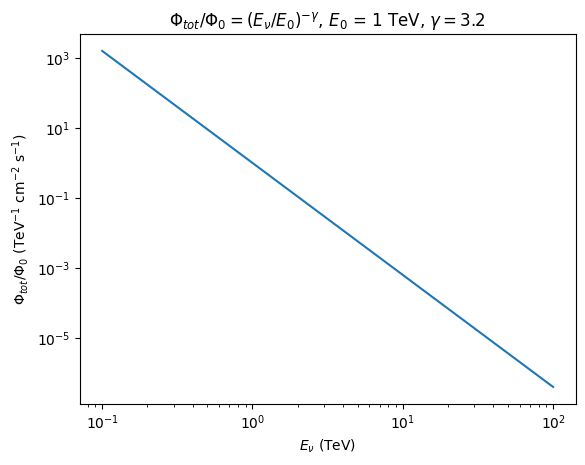

In [4]:
# Plotting the flux (power law) (I think this is total flux?)

import matplotlib.pyplot as plt

# Parameters:
phi0 = 1 # TeV^-1 cm^-2 s^-1
e0 = 1 # TeV
index = 3.2
width = 0.3 # Taken from the 30% energy resolution of track-like events

e_true = np.logspace(-1, 2, num=100)

flux = phi0*(e_true/e0)**(-index)

fig, ax = plt.subplots()
flx = ax.plot(e_true, flux)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$E_{\nu}$ (TeV)")
ax.set_ylabel(r"$\Phi_{tot} / \Phi_0$ (TeV$^{-1}$ cm$^{-2}$ s$^{-1}$)")
ax.set_title(r"$\Phi_{tot} / \Phi_0 = (E_{\nu} / E_0)^{-\gamma}$, $E_0$ = 1 TeV, $\gamma = 3.2$")
ax.set_xticks([10**-1, 10**0, 10**1, 10**2])
plt.show()

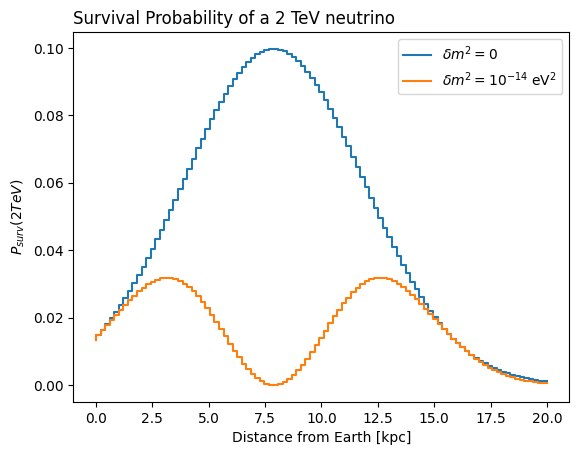

In [5]:
# Plotting the Gaussian used in the NGC paper

from scipy.stats import norm
from scipy.integrate import quad

a = np.linspace(0, 20, 100)

width = 4
dist_peak = 8
gauss = norm.pdf(a, dist_peak, width)
mult = norm.pdf(a, dist_peak, width) * (np.cos(((np.pi)/16)*a))**2

fig, ax = plt.subplots()
gauss, = ax.step(a, gauss)
mult, = ax.step(a, mult)
ax.set_xlabel(r"Distance from Earth [kpc]")
ax.set_ylabel(r"$P_{surv}(2 TeV)$")
ax.set_title("Survival Probability of a 2 TeV neutrino", loc="left")
# ax.set_title("$\delta m^2 = 10^{-14}$ eV$^2$", loc='right')
ax.legend([gauss, mult], [r"$\delta m^2 = 0$", r"$\delta m^2 = 10^{-14}$ eV$^2$"])

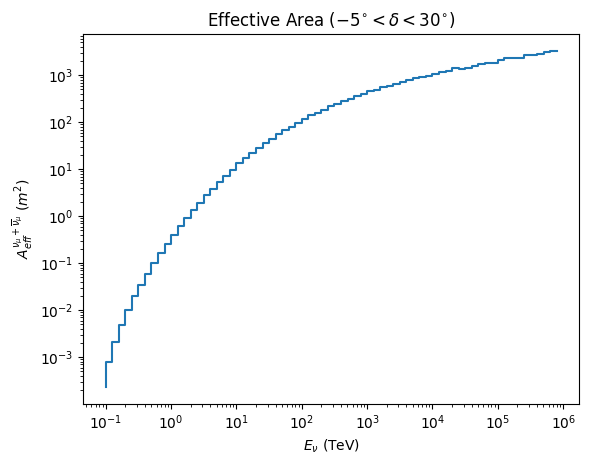

In [6]:
# Plotting Effective Area

fig, ax = plt.subplots()
plot1 = ax.step(eff_a[:,0], eff_a[:,4])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$E_{\nu}$ (TeV)")
ax.set_ylabel(r"$A_{eff}^{\nu_{\mu} + \overline{\nu}_{\mu}}$ ($m^2$)")
ax.set_title(r"Effective Area ($-5^{\circ} < \delta < 30^{\circ}$)")
plt.show()

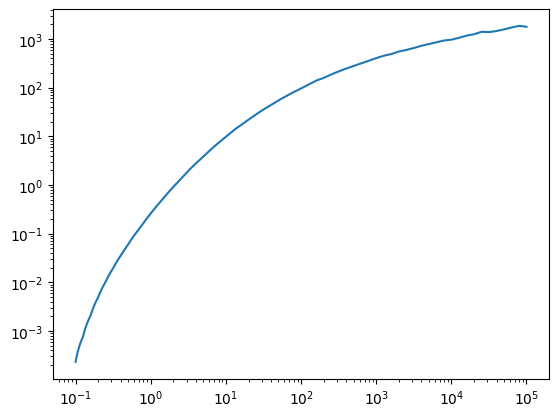

In [7]:
from scipy.interpolate import interp1d

x = eff_a[:,0]
y = eff_a[:,4]
f = interp1d(x, y)

a = np.logspace(-1, 5, 1000)
ynew = f(a)
fig, ax = plt.subplots()
plot = ax.plot(a, ynew)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [8]:
def TrueIntApproxLog(log_e_reco, del_m2):
    lower_bound = max(np.log10(e_min), log_e_reco-1.5)
    upper_bound = min(np.log10(e_max), log_e_reco+1.5)
    bins = np.linspace(lower_bound, upper_bound, 10)
    evals = []
    for i in range(len(bins)-1):
        evals.append(TrueIntegrandLog(bins[i], bins[i+1], del_m2)(bins[i+1] - bins[i]))




In [9]:
import numpy as np
from scipy import signal, interpolate

a = -1
b = 2
m = -10
n = 15

samples_num = 100
x_eval_index = 200
t_eval_index = 300

x_samples = np.linspace(a, b, samples_num)
t_samples = np.linspace(m, n, samples_num)
dx = x_samples[1]-x_samples[0]
dt = t_samples[1]-t_samples[0]

g = lambda x,t: np.exp(-np.abs(x))+t
h = lambda x,t: np.exp(-np.abs(x))-t

discretG = g(x_samples[None, :], t_samples[:, None])
discretH = h(x_samples[None, :], t_samples[:, None])

discretF = signal.fftconvolve(discretG, discretH, mode='full')

In [10]:
print(discretF)

[[  -99.86466472  -199.72100176  -299.56862679 ...  -299.94161998
   -199.96224169   -99.98168436]
 [ -194.67882438  -389.34099341  -583.98573843 ...  -584.73172482
   -389.82347329  -194.91286367]
 [ -284.506248    -568.98751297  -853.44264193 ...  -854.56162151
   -569.71123278  -284.85730693]
 ...
 [ -651.93049043 -1303.83599782 -1955.7153692  ... -1956.83434878
  -1304.55971763  -652.28154936]
 [ -442.15357186  -884.29048836 -1326.40998086 ... -1327.15596724
   -884.77296824  -442.38761115]
 [ -224.86466472  -449.72100176  -674.56862679 ...  -674.94161998
   -449.96224169  -224.98168436]]


In [11]:
a = [1, 2, 3]
b = [4, 5]
d = [0, 0, 0]
print(d)
c = a+b+d
print(c)
d = np.zeros((4))
print(d)

[0, 0, 0]
[1, 2, 3, 4, 5, 0, 0, 0]
[0. 0. 0. 0.]


In [8]:
from scipy.interpolate import interp1d

In [13]:
#Discretize time t
t0=-100
dt=0.01
t=np.arange(t0,-t0,dt)
#Define function
f=np.cos(1/t)

#Compute Fourier transform by numpy's FFT function
g=np.fft.fft(f)
#frequency normalization factor is 2*np.pi/dt
w = np.fft.fftfreq(f.size)*2*np.pi/dt

#In order to get a discretisation of the continuous Fourier transform
#we need to multiply g by a phase factor
g *= dt*np.exp(-complex(0,1)*w*t0)/(np.sqrt(2*np.pi))

F = interp1d(w, g)



In [302]:
f = np.cos(t)
g = np.sin(t)
z = (t*np.sin(t))/2
F = np.fft.fft(f)
G = np.fft.fft(g)
H = np.multiply(F, G)
h = np.fft.ifft(H)

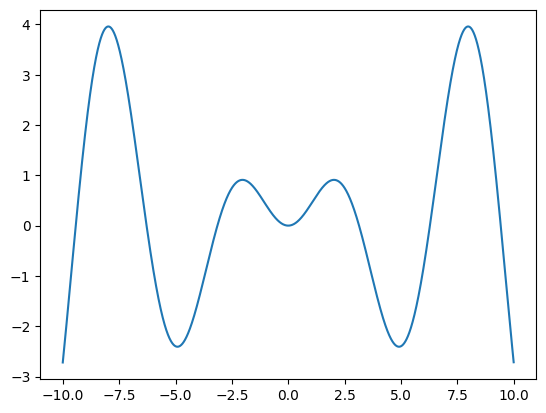

In [304]:
fig, ax = plt.subplots()
sin_cos_conv = ax.plot(t, z)
# FFT_conv = ax.plot(t, h.real)

In [14]:
freq_sample = np.arange(-10, 10, 0.001)
F_sample = []
for i in range(len(freq_sample)):
    F_sample.append(F(freq_sample[i]))

Text(0.5, 1.0, '$f(t) = \\cos(1/t)$, $t \\in [-100, 100]$, $dt = 0.01$')

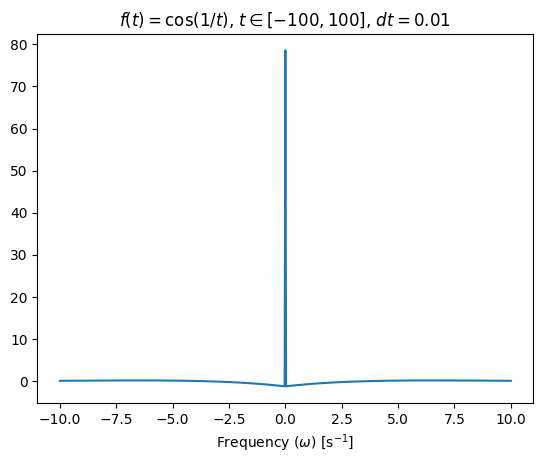

In [15]:
fig, ax = plt.subplots()
# sin = ax.plot(x, y)
sinFT_sample = ax.plot(freq_sample, F_sample)
ax.set_xlabel(r"Frequency ($\omega$) [s$^{-1}$]")
ax.set_title(r"$f(t) = \cos(1/t)$, $t \in [-100, 100]$, $dt = 0.01$")

Text(0.5, 1.0, '$t \\in [-100, 100]$, $dt = 0.1$')

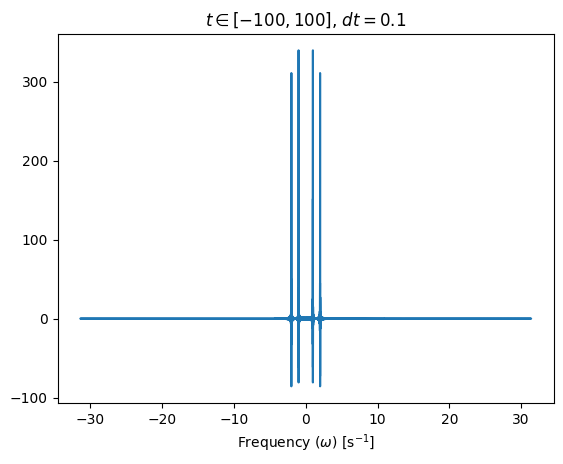

In [287]:
fig, ax = plt.subplots()
# sin = ax.plot(x, y)
sinFT = ax.plot(w, g)
ax.set_xlabel(r"Frequency ($\omega$) [s$^{-1}$]")
ax.set_title(r"$t \in [-100, 100]$, $dt = 0.1$")

In [21]:
import math
print(math.factorial(4))

24


In [32]:
a = np.arange(-100, 100,0.01)
b = np.cos(1/a)

In [33]:
def CosFTapprox(w, alpha, n):
    sum1 = 0
    for i in range(1,n): 
        sum1=sum1 + ((alpha**(2*i)*i)/(math.factorial(2*i))**2)*np.abs(w)**(2*i-1)
    return sum1

In [34]:
cos_ft_approx = np.zeros((a.size))
for i in range(a.size):
    cos_ft_approx[i] = CosFTapprox(a[i], 1, 10)

Text(0.5, 1.0, '$cos(1/t)$ FT attempt with Taylor Series (w/o delta fcn)')

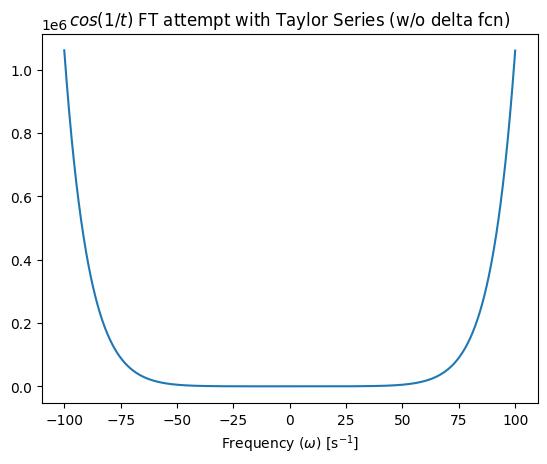

In [35]:
fig, ax = plt.subplots()
cos = ax.plot(a, cos_ft_approx)
ax.set_xlabel(r"Frequency ($\omega$) [s$^{-1}$]")
ax.set_title(r"$cos(1/t)$ FT attempt with Taylor Series (w/o delta fcn)")

In [3]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica")
c = (1, 2, 3)

x = zip(a, b, c)
print(list(x))

[('John', 'Jenny', 1), ('Charles', 'Christy', 2), ('Mike', 'Monica', 3)]


In [8]:
x = [1, 2, 3, 4, 5, 6]
x[:-1]

[1, 2, 3, 4, 5]

In [11]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr.sum(axis=0)

array([5, 7, 9])

In [16]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# print(arr[:, None])
print(np.newaxis(arr))

TypeError: 'NoneType' object is not callable

In [22]:
tri = np.array([[1, 1],
                [3, 1],
                [2, 3]])

centroid = tri.mean(axis=0)

print(tri**2)

dist = np.sum(tri**2, axis=1)**0.5
print(dist)

[[1 1]
 [9 1]
 [4 9]]
[1.41421356 3.16227766 3.60555128]


In [23]:
list = [(1, 2), (2, 3), (3, 4)]
arr = np.asarray(list)
print(arr)

[[1 2]
 [2 3]
 [3 4]]


In [27]:
array = np.array([1, 1, 0.5, 1, 0.003, 5.4])
for index, element in enumerate(array):
    print(index)

0
1
2
3
4
5
